In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('imdb_all_seasons.csv')
df

,ratings,votes,sid,hosts,date_datetime,epid
0,7.4,543,1,Saturday Night Live: George Carlin/Billy Pres...,1975-10-11,19751011
1,6.2,354,1,Paul Simon/Randy Newman/Phoebe Snow,1975-10-18,19751018
2,6.9,303,1,Rob Reiner,1975-10-25,19751025
3,7.0,281,1,Candice Bergen/Esther Phillips,1975-11-08,19751108
4,6.5,245,1,"Robert Klein/ABBA, Loudon Wainwright III",1975-11-15,19751115
...,...,...,...,...,...,...
906,6.8,532,46,Bill Burr/Jack White,2020-10-10,20201010
907,6.1,332,46,Maya Rudolph/Jack Harlow,2021-03-27,20210327
908,6.4,501,46,Chris Rock/Megan Thee Stallion,2020-10-03,20201003
909,6.8,368,46,Kristen Wiig/Dua Lipa,2020-12-19,20201219


In [4]:
df_grouped = df.groupby('sid')['ratings'].mean()
df_grouped


sid
1     6.975000
2     7.056522
3     7.225000
4     7.125000
5     6.700000
6     6.053846
7     6.240000
8     6.985000
9     6.210526
10    6.377778
11    5.900000
12    6.455000
13    6.215385
14    6.115000
15    6.180000
16    6.420000
17    7.105000
18    6.640000
19    6.275000
20    6.825000
21    6.535000
22    5.760000
23    5.985000
24    6.005263
25    6.350000
26    5.840000
27    5.900000
28    5.385000
29    5.610000
30    5.755000
31    6.273684
32    6.970000
33    7.083333
34    6.859091
35    6.640909
36    6.840909
37    7.045455
38    6.904762
39    7.066667
40    6.833333
41    6.652381
42    6.938095
43    6.823810
44    6.676190
45    6.855556
46    6.540000
Name: ratings, dtype: float64

## Interestingly, ratings by seasons doesn't actually vary that much

<Axes: title={'center': 'Mean Ratings of Each Season'}, xlabel='Season ID', ylabel='Mean Rating'>

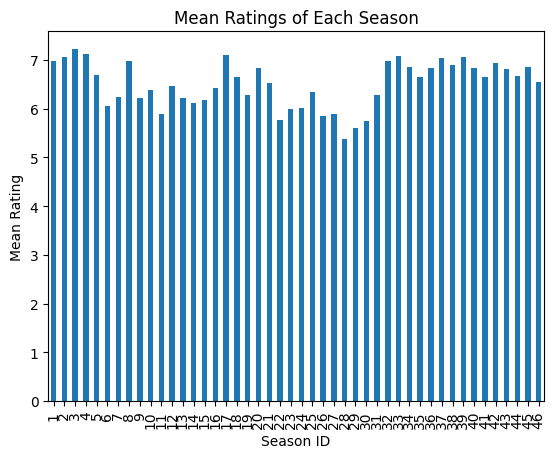

In [5]:
#plotting the mean ratings of each season
df_grouped.plot(kind='bar', title='Mean Ratings of Each Season', xlabel='Season ID', ylabel='Mean Rating')

<Axes: title={'center': 'Scatter Plot of Ratings vs Date'}, xlabel='Date', ylabel='Ratings'>

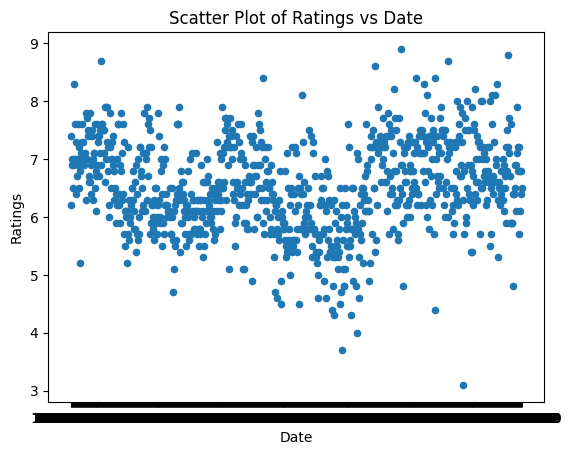

In [6]:
#scatter plot of ratings vs date_datetime
df.plot.scatter(x='date_datetime', y='ratings', title='Scatter Plot of Ratings vs Date', xlabel='Date', ylabel='Ratings')

In [7]:
df_actors = pd.read_csv('./output/actors.csv')
df_actors

,aid,url,type,gender
0,Kate McKinnon,/Cast/?KaMc,cast,female
1,Alex Moffat,/Cast/?AlMo,cast,male
2,Ego Nwodim,/Cast/?EgNw,cast,unknown
3,Chris Redd,/Cast/?ChRe,cast,male
4,Kenan Thompson,/Cast/?KeTh,cast,male
...,...,...,...,...
2301,Jesse Dixon Singers,/Guests/?16,guest,male
2302,Connie Hawkins,/Guests/?21,guest,female
2303,Billy Preston,/Guests/?3,guest,male
2304,Janis Ian,/Guests/?2,guest,female


In [8]:
df_appearances = pd.read_csv('./output/appearances.csv')
df_appearances

,aid,tid,capacity,role,charid,impid,voice,epid,sid
0,Kate McKinnon,202104101,cast,Joanne,NaN,NaN,False,20210410,46
1,Alex Moffat,202104101,cast,Craig Matthew Yorgensen,NaN,NaN,False,20210410,46
2,Ego Nwodim,202104101,cast,anchor,NaN,NaN,False,20210410,46
3,Chris Redd,202104101,cast,Calvin,NaN,NaN,False,20210410,46
4,Kenan Thompson,202104101,cast,anchor,NaN,NaN,False,20210410,46
...,...,...,...,...,...,...,...,...,...
55350,John Belushi,1975101123,cast,Mr. Kromer,NaN,NaN,False,19751011,1
55351,Garrett Morris,1975101123,cast,Harvey Morgomaster,NaN,NaN,False,19751011,1
55352,Gilda Radner,1975101123,cast,Mrs. Kromer,NaN,NaN,False,19751011,1
55353,Al Franken,1975101124,cast,caveman,NaN,NaN,False,19751011,1


In [9]:
merged_df = pd.merge(df_actors, df_appearances, on='aid')
merged_df


,aid,url,type,gender,tid,capacity,role,charid,impid,voice,epid,sid
0,Kate McKinnon,/Cast/?KaMc,cast,female,202104101,cast,Joanne,NaN,NaN,False,20210410,46
1,Kate McKinnon,/Cast/?KaMc,cast,female,202104105,cast,Josh,NaN,NaN,False,20210410,46
2,Kate McKinnon,/Cast/?KaMc,cast,female,2021041010,cast,corporal,NaN,NaN,False,20210410,46
3,Kate McKinnon,/Cast/?KaMc,cast,female,2021041011,cast,Beverly,NaN,NaN,False,20210410,46
4,Kate McKinnon,/Cast/?KaMc,cast,female,202104031,cast,Pepé Le Pew,NaN,NaN,False,20210403,46
...,...,...,...,...,...,...,...,...,...,...,...,...
55350,Billy Preston,/Guests/?3,guest,male,197510114,music,NaN,NaN,NaN,False,19751011,1
55351,Billy Preston,/Guests/?3,guest,male,1975101122,music,NaN,NaN,NaN,False,19751011,1
55352,Janis Ian,/Guests/?2,guest,female,197510118,music,NaN,NaN,NaN,False,19751011,1
55353,Janis Ian,/Guests/?2,guest,female,1975101125,music,NaN,NaN,NaN,False,19751011,1


In [10]:
merged_df['type'].unique()

array(['cast', 'guest', 'crew', 'unknown'], dtype=object)

In [11]:
df_cast_appearances = merged_df[merged_df['type'] == 'cast']
df_cast_appearances

,aid,url,type,gender,tid,capacity,role,charid,impid,voice,epid,sid
0,Kate McKinnon,/Cast/?KaMc,cast,female,202104101,cast,Joanne,NaN,NaN,False,20210410,46
1,Kate McKinnon,/Cast/?KaMc,cast,female,202104105,cast,Josh,NaN,NaN,False,20210410,46
2,Kate McKinnon,/Cast/?KaMc,cast,female,2021041010,cast,corporal,NaN,NaN,False,20210410,46
3,Kate McKinnon,/Cast/?KaMc,cast,female,2021041011,cast,Beverly,NaN,NaN,False,20210410,46
4,Kate McKinnon,/Cast/?KaMc,cast,female,202104031,cast,Pepé Le Pew,NaN,NaN,False,20210403,46
...,...,...,...,...,...,...,...,...,...,...,...,...
54776,George Coe,/Cast/?GeCo,cast,male,197510255,cast,spokesperson,NaN,NaN,False,19751025,1
54777,George Coe,/Cast/?GeCo,cast,male,197510115,cast,judge,NaN,NaN,False,19751011,1
54778,George Coe,/Cast/?GeCo,cast,male,1975101113,cast,announcer,NaN,NaN,True,19751011,1
54779,George Coe,/Cast/?GeCo,cast,male,1975101117,cast,bee,NaN,NaN,False,19751011,1


In [12]:
cast_appearances_count = df_cast_appearances['aid'].value_counts()
cast_appearances_count

aid
Kenan Thompson     1452
Phil Hartman       1082
Darrell Hammond    1047
Fred Armisen        888
Bill Hader          850
                   ... 
George Coe           14
Morwenna Banks       10
Dan Vitale            8
Emily Prager          6
Laurie Metcalf        2
Name: count, Length: 154, dtype: int64

In [13]:
# cast_appearances_count_sorted = cast_appearances_count.sort_values(ascending=True)
# cast_appearances_count_sorted.plot(kind='barh', title='Number of Appearances of Each Actor', xlabel='Actor ID', ylabel='Number of Sketch Appearances', figsize=(10, 50))


In [14]:
df_tenure = pd.read_csv('./output/tenure.csv')
df_tenure

,aid,n_episodes,eps_present,n_seasons
0,Kate McKinnon,187,187,10
1,Alex Moffat,98,96,5
2,Ego Nwodim,56,55,3
3,Chris Redd,77,74,4
4,Kenan Thompson,361,358,18
...,...,...,...,...
149,Peter Aykroyd,12,9,1
150,Jane Curtin,106,105,5
151,Laraine Newman,106,104,5
152,Gilda Radner,106,103,5


In [15]:
df_cast_appearances_count = pd.DataFrame(cast_appearances_count)
df_cast_appearances_count.columns = ['count']
df_cast_appearances_count


,count
aid,
Kenan Thompson,1452
Phil Hartman,1082
Darrell Hammond,1047
Fred Armisen,888
Bill Hader,850
...,...
George Coe,14
Morwenna Banks,10
Dan Vitale,8


In [16]:
df_cast_appearances_count = df_cast_appearances_count.reset_index()
df_cast_appearances_count.columns = ['aid', 'count']

In [17]:
df_cast_appearances_count['avg_appearance'] = df_cast_appearances_count['count'] / df_tenure['n_seasons']
df_cast_appearances_count

,aid,count,avg_appearance
0,Kenan Thompson,1452,145.200000
1,Phil Hartman,1082,216.400000
2,Darrell Hammond,1047,349.000000
3,Fred Armisen,888,222.000000
4,Bill Hader,850,47.222222
...,...,...,...
149,George Coe,14,14.000000
150,Morwenna Banks,10,2.000000
151,Dan Vitale,8,1.600000
152,Emily Prager,6,1.200000


<Axes: title={'center': 'Average Appearance of Each Actor'}, xlabel='Average Appearance', ylabel='Actor ID'>

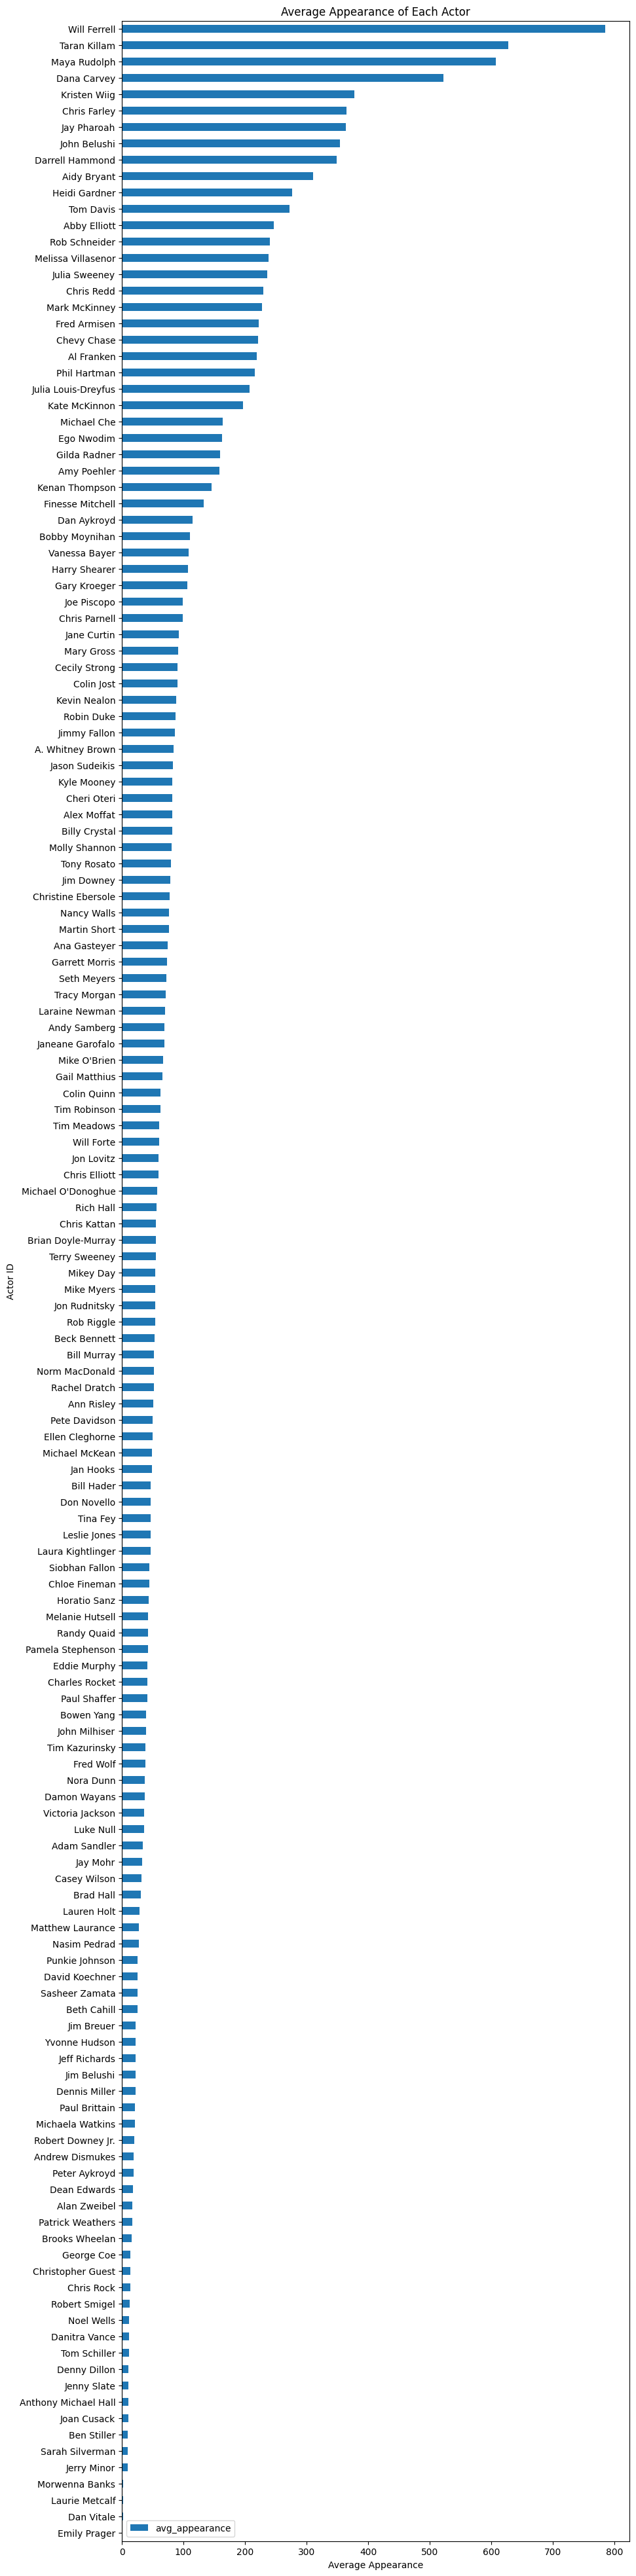

In [26]:
df_cast_appearances_count_sorted = df_cast_appearances_count.sort_values(by='avg_appearance', ascending=True)
df_cast_appearances_count_sorted.plot(x='aid', y='avg_appearance', kind='barh', title='Average Appearance of Each Actor', xlabel='Average Appearance', ylabel='Actor ID', figsize=(10, 50))


# I now want the number of times a cast member appears in an episode. 

I'm working towards developing a weight for the episode ratings. The idea then is that a cast member that has appeared more in an episode would have contributed more to how well it performed.

In [19]:
df_appearance_epid = df_cast_appearances.groupby('epid')['aid'].value_counts().reset_index(name='count')
df_appearance_epid


,epid,aid,count
0,19751011,Chevy Chase,7
1,19751011,Dan Aykroyd,5
2,19751011,Laraine Newman,5
3,19751011,Gilda Radner,5
4,19751011,John Belushi,5
...,...,...,...
12262,20210410,Lauren Holt,1
12263,20210410,Kyle Mooney,1
12264,20210410,Pete Davidson,1
12265,20210410,Michael Che,1


In [20]:
df_appearance_epid[df_appearance_epid['epid'] == 20210410]

,epid,aid,count
12248,20210410,Aidy Bryant,5
12249,20210410,Beck Bennett,4
12250,20210410,Chris Redd,4
12251,20210410,Kate McKinnon,4
12252,20210410,Alex Moffat,3
12253,20210410,Ego Nwodim,3
12254,20210410,Heidi Gardner,3
12255,20210410,Kenan Thompson,3
12256,20210410,Mikey Day,3
12257,20210410,Bowen Yang,2


In [21]:
df_appearance_epid = pd.merge(df_appearance_epid, df[['epid', 'ratings']], on='epid')
df_appearance_epid


,epid,aid,count,ratings
0,19751011,Chevy Chase,7,7.4
1,19751011,Dan Aykroyd,5,7.4
2,19751011,Laraine Newman,5,7.4
3,19751011,Gilda Radner,5,7.4
4,19751011,John Belushi,5,7.4
...,...,...,...,...
12155,20210410,Lauren Holt,1,6.9
12156,20210410,Kyle Mooney,1,6.9
12157,20210410,Pete Davidson,1,6.9
12158,20210410,Michael Che,1,6.9


In [31]:
df_unique_tids = df_appearances.groupby('epid')['tid'].nunique()
df_unique_tids


epid
19751011    25
19751018    17
19751025    18
19751108    20
19751115    21
            ..
20210220    14
20210227    12
20210327    12
20210403    12
20210410    13
Name: tid, Length: 905, dtype: int64

In [37]:
df_appearance_epid

,epid,aid,count,ratings,total_segments
0,19751011,Chevy Chase,7,7.4,NaN
1,19751011,Dan Aykroyd,5,7.4,NaN
2,19751011,Laraine Newman,5,7.4,NaN
3,19751011,Gilda Radner,5,7.4,NaN
4,19751011,John Belushi,5,7.4,NaN
...,...,...,...,...,...
12155,20210410,Lauren Holt,1,6.9,NaN
12156,20210410,Kyle Mooney,1,6.9,NaN
12157,20210410,Pete Davidson,1,6.9,NaN
12158,20210410,Michael Che,1,6.9,NaN


In [35]:
df_unique_tids = df_unique_tids.reset_index()
df_unique_tids.columns = ['epid', 'num_segments']

In [46]:
df_unique_tids

,epid,num_segments
0,19751011,25
1,19751018,17
2,19751025,18
3,19751108,20
4,19751115,21
...,...,...
900,20210220,14
901,20210227,12
902,20210327,12
903,20210403,12


In [39]:
df_appearance_epid = df_appearance_epid.drop('total_segments', axis=1)
df_appearance_epid


,epid,aid,count,ratings
0,19751011,Chevy Chase,7,7.4
1,19751011,Dan Aykroyd,5,7.4
2,19751011,Laraine Newman,5,7.4
3,19751011,Gilda Radner,5,7.4
4,19751011,John Belushi,5,7.4
...,...,...,...,...
12155,20210410,Lauren Holt,1,6.9
12156,20210410,Kyle Mooney,1,6.9
12157,20210410,Pete Davidson,1,6.9
12158,20210410,Michael Che,1,6.9


In [56]:
weights = []

In [57]:
for index, row in df_appearance_epid.iterrows():
    weights.append(row['count'] / df_unique_tids[df_unique_tids['epid'] == row['epid']]['num_segments'].values[0])

df_appearance_epid['weights'] = weights

df_appearance_epid

,epid,aid,count,ratings,wt,weights
0,19751011,Chevy Chase,7,7.4,NaN,0.280000
1,19751011,Dan Aykroyd,5,7.4,NaN,0.200000
2,19751011,Laraine Newman,5,7.4,NaN,0.200000
3,19751011,Gilda Radner,5,7.4,NaN,0.200000
4,19751011,John Belushi,5,7.4,NaN,0.200000
...,...,...,...,...,...,...
12155,20210410,Lauren Holt,1,6.9,NaN,0.076923
12156,20210410,Kyle Mooney,1,6.9,NaN,0.076923
12157,20210410,Pete Davidson,1,6.9,NaN,0.076923
12158,20210410,Michael Che,1,6.9,NaN,0.076923


In [61]:
df_appearance_epid['wt_ratings'] = df_appearance_epid['ratings'] * df_appearance_epid['weights']
df_appearance_epid

,epid,aid,count,ratings,weights,wt_ratings
0,19751011,Chevy Chase,7,7.4,0.280000,2.072000
1,19751011,Dan Aykroyd,5,7.4,0.200000,1.480000
2,19751011,Laraine Newman,5,7.4,0.200000,1.480000
3,19751011,Gilda Radner,5,7.4,0.200000,1.480000
4,19751011,John Belushi,5,7.4,0.200000,1.480000
...,...,...,...,...,...,...
12155,20210410,Lauren Holt,1,6.9,0.076923,0.530769
12156,20210410,Kyle Mooney,1,6.9,0.076923,0.530769
12157,20210410,Pete Davidson,1,6.9,0.076923,0.530769
12158,20210410,Michael Che,1,6.9,0.076923,0.530769


In [64]:
df_cast_ratings = df_appearance_epid.groupby('aid')['wt_ratings'].mean()
df_cast_ratings

aid
A. Whitney Brown    0.625922
Abby Elliott        1.519120
Adam Sandler        1.360344
Aidy Bryant         1.855603
Al Franken          0.668298
                      ...   
Vanessa Bayer       1.880611
Victoria Jackson    1.367188
Will Ferrell        2.292242
Will Forte          1.592081
Yvonne Hudson       0.601234
Name: wt_ratings, Length: 154, dtype: float64

In [65]:
df_cast_ratings = df_cast_ratings.reset_index()
df_cast_ratings.columns = ['cast', 'avg_rating']
df_cast_ratings

,cast,avg_rating
0,A. Whitney Brown,0.625922
1,Abby Elliott,1.519120
2,Adam Sandler,1.360344
3,Aidy Bryant,1.855603
4,Al Franken,0.668298
...,...,...
149,Vanessa Bayer,1.880611
150,Victoria Jackson,1.367188
151,Will Ferrell,2.292242
152,Will Forte,1.592081


In [66]:
df_cast_ratings.rename(columns={'avg_rating': 'wt_rating'}, inplace=True)
df_cast_ratings


,cast,wt_rating
0,A. Whitney Brown,0.625922
1,Abby Elliott,1.519120
2,Adam Sandler,1.360344
3,Aidy Bryant,1.855603
4,Al Franken,0.668298
...,...,...
149,Vanessa Bayer,1.880611
150,Victoria Jackson,1.367188
151,Will Ferrell,2.292242
152,Will Forte,1.592081


In [69]:
df_cast_ratings_sorted = df_cast_ratings.sort_values(by='wt_rating', ascending=False)
df_cast_ratings_sorted

,cast,wt_rating
17,Bill Murray,2.969162
125,Phil Hartman,2.908201
90,Kristen Wiig,2.587959
139,Taran Killam,2.559683
16,Bill Hader,2.541246
...,...,...
61,George Coe,0.591953
57,Fred Wolf,0.579921
54,Emily Prager,0.502497
133,Robert Smigel,0.491429


<Axes: title={'center': 'Weighted Average Rating of Each Actor'}, xlabel='Weighted Average Rating', ylabel='Actor ID'>

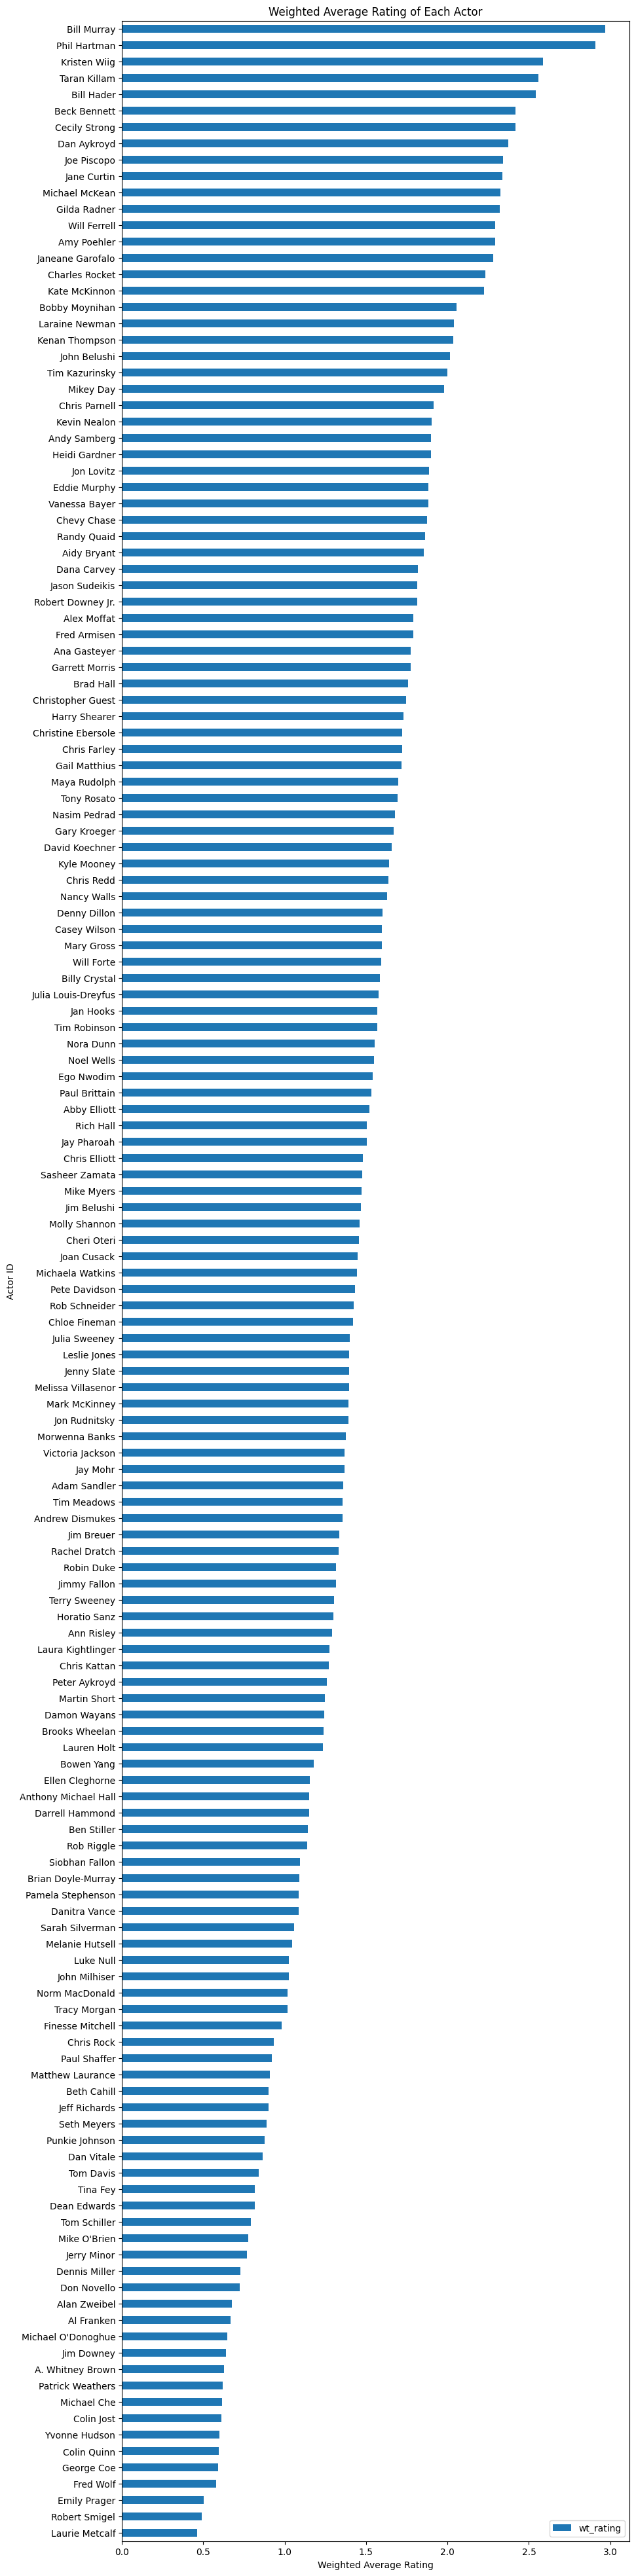

In [71]:
df_cast_ratings_sorted = df_cast_ratings.sort_values(by='wt_rating', ascending=True)
df_cast_ratings_sorted.plot(x='cast', y='wt_rating', kind='barh', title='Weighted Average Rating of Each Actor', xlabel='Weighted Average Rating', ylabel='Actor ID', figsize=(10, 50))

In [72]:
df_cast_ratings_sorted.to_csv('snl_cast_weighted_scores.csv', index=False)
print('File saved as snl_cast_weighted_scores.csv')


File saved as snl_cast_weighted_scores.csv


In [75]:
df_appearance_epid.to_csv('snl_cast_database.csv', index=False)
print('File saved as snl_cast_database.csv')


File saved as snl_cast_database.csv


In [80]:
#season with the best score
df_grouped.idxmax()


3

In [81]:
#season with the worst score
df_grouped.idxmin()

28

In [85]:
df_cast_ratings_sorted.sort_values(by='wt_rating', ascending=False).head(10)

,cast,wt_rating
17,Bill Murray,2.969162
125,Phil Hartman,2.908201
90,Kristen Wiig,2.587959
139,Taran Killam,2.559683
16,Bill Hader,2.541246
13,Beck Bennett,2.416022
25,Cecily Strong,2.415657
41,Dan Aykroyd,2.372834
80,Joe Piscopo,2.342232
67,Jane Curtin,2.337513


In [86]:
df_cast_ratings_sorted.sort_values(by='wt_rating', ascending=True).head(10)

,cast,wt_rating
95,Laurie Metcalf,0.464286
133,Robert Smigel,0.491429
54,Emily Prager,0.502497
57,Fred Wolf,0.579921
61,George Coe,0.591953
39,Colin Quinn,0.595852
153,Yvonne Hudson,0.601234
38,Colin Jost,0.611760
105,Michael Che,0.615888
120,Patrick Weathers,0.620727


In [87]:
df_cast_ratings_sorted.to_json('snl_cast_ratings_sorted.json', orient='records')
print('Dataframe exported as snl_cast_ratings_sorted.json')

Dataframe exported as snl_cast_ratings_sorted.json


In [92]:
df_cast_ranks = df_cast_ratings_sorted
df_cast_ranks['rank'] = df_cast_ratings_sorted['wt_rating'].rank(ascending=False)
df_cast_ranks

,cast,wt_rating,rank
95,Laurie Metcalf,0.464286,154.0
133,Robert Smigel,0.491429,153.0
54,Emily Prager,0.502497,152.0
57,Fred Wolf,0.579921,151.0
61,George Coe,0.591953,150.0
...,...,...,...
16,Bill Hader,2.541246,5.0
139,Taran Killam,2.559683,4.0
90,Kristen Wiig,2.587959,3.0
125,Phil Hartman,2.908201,2.0


In [93]:
df_cast_ranks['rank'] = df_cast_ranks['rank'].astype(int)
df_cast_ranks

,cast,wt_rating,rank
95,Laurie Metcalf,0.464286,154
133,Robert Smigel,0.491429,153
54,Emily Prager,0.502497,152
57,Fred Wolf,0.579921,151
61,George Coe,0.591953,150
...,...,...,...
16,Bill Hader,2.541246,5
139,Taran Killam,2.559683,4
90,Kristen Wiig,2.587959,3
125,Phil Hartman,2.908201,2


In [94]:
#export df_cast_ranks to json
df_cast_ranks.to_json('snl_cast_ranks.json', orient='records')
print('Dataframe exported as snl_cast_ranks.json')

Dataframe exported as snl_cast_ranks.json
